In [1]:
import os
import glob
import tifffile
import numpy as np
import torch
import cv2 as cv
import matplotlib.pyplot as plot

# 选择关键帧率

In [25]:
file_name = "Averaged shifted histograms 10.tif"

input_high = tifffile.imread(
    f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/high/{file_name}"
)

input_low = tifffile.imread(
    f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/low/{file_name}"
)

index_l = 7
index_r = 12

output_high = input_high[index_l : index_r, ...]

output_low = input_low[index_l : index_r, ...]

tifffile.imsave(
    f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/high/1/{file_name}",
    output_high)

tifffile.imsave(
    f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/low/1/{file_name}",
    output_low)

print('运行完成')

运行完成


# 去除黑边

In [ ]:
input = tifffile.imread(
    "/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/Averaged shifted histograms 11.tif"
)

z_project = np.sum(input, 0)
x_sum = np.sum(z_project, axis=0)
y_sum = np.sum(z_project, axis=1)

up = 0
down = z_project.shape[0]
left = 0
right = z_project.shape[1]

up = min(np.where(y_sum != 0)[0]) - 10 if min(np.where(y_sum != 0)[0]) > 10 else 0
down = max(np.where(y_sum != 0)[0]) + 10 if max(np.where(
    y_sum != 0)[0]) < z_project.shape[0] - 10 else z_project.shape[0]
left = min(np.where(x_sum != 0)[0]) - 10 if min(np.where(x_sum != 0)[0]) > 10 else 0
right = max(np.where(x_sum != 0)[0]) + 10 if min(np.where(
    x_sum != 0)[0]) < z_project.shape[1] - 10 else z_project.shape[1]


output = input[:, up:down, left:right]

tifffile.imsave(
    "/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/Averaged shifted histograms 11.tif",
    output)

print('运行完成')

# 滑动截取ROI区域

运行完成


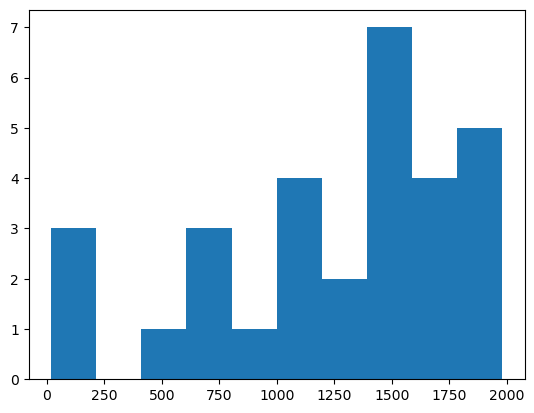

In [26]:
name = 10

input_high = tifffile.imread(
    f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/high/1/Averaged shifted histograms {name}.tif"
)

input_low = tifffile.imread(
    f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/low/1/Averaged shifted histograms {name}.tif"
)

data_dict = {}
point_list = []
size = 128
step = 32
_, h, w = input_high.shape
for x in range(0, w - size, step):
    for y in range(0, h - size, step):
        crop_data_high = input_high[:, y:y + size, x:x + size]
        crop_data_high = cv.resize(crop_data_high.transpose(1, 2, 0),
                              (64, 64)).transpose(2, 0, 1)

        crop_data_low = input_low[:, y:y + size, x:x + size]
        crop_data_low = cv.resize(crop_data_low.transpose(1, 2, 0),
                              (64, 64)).transpose(2, 0, 1)

        z_project = np.sum(crop_data_high, 0)
        z_project[z_project != 0] = 1

        count_point = np.sum(z_project)
        point_list.append(count_point)

        data_dict[f"{x}:{y}:{count_point}"] = [crop_data_high, crop_data_low]

plot.hist(point_list)

print('运行完成')

In [27]:
flag = False

if flag:
    i = 1

for k, data in data_dict.items():
    if float(k.split(":")[-1]) > 550:
        data_high, data_low = data
        data_high_lr = np.flip(data_high.transpose(1, 2, 0), 0).transpose(2, 0, 1)
        data_high_up = np.flip(data_high.transpose(1, 2, 0), 1).transpose(2, 0, 1)
        data_low_lr = np.flip(data_low.transpose(1, 2, 0), 0).transpose(2, 0, 1)
        data_low_up = np.flip(data_low.transpose(1, 2, 0), 1).transpose(2, 0, 1)
        
        data_high_90 = np.rot90(data_high.transpose(1, 2, 0)).transpose(2, 0, 1)
        data_high_90_lr = np.flip(np.rot90(data_high.transpose(1, 2, 0)), 0).transpose(2, 0, 1)
        data_high_90_up = np.flip(np.rot90(data_high.transpose(1, 2, 0)), 1).transpose(2, 0, 1)

        data_high_180 = np.rot90(data_high_90.transpose(1, 2, 0)).transpose(2, 0, 1)
        data_high_180_lr = np.flip(np.rot90(data_high_90.transpose(1, 2, 0)), 0).transpose(2, 0, 1)
        data_high_180_up = np.flip(np.rot90(data_high_90.transpose(1, 2, 0)), 1).transpose(2, 0, 1)
        
        data_high_270 = np.rot90(data_high_180.transpose(1, 2, 0)).transpose(2, 0, 1)
        data_high_270_lr = np.flip(np.rot90(data_high_180.transpose(1, 2, 0)), 0).transpose(2, 0, 1)
        data_high_270_up = np.flip(np.rot90(data_high_180.transpose(1, 2, 0)), 1).transpose(2, 0, 1)
        
        data_low_90 = np.rot90(data_low.transpose(1, 2, 0)).transpose(2, 0, 1)
        data_low_90_lr = np.flip(np.rot90(data_low.transpose(1, 2, 0)), 0).transpose(2, 0, 1)
        data_low_90_up = np.flip(np.rot90(data_low.transpose(1, 2, 0)), 1).transpose(2, 0, 1)
        
        data_low_180 = np.rot90(data_low_90.transpose(1, 2, 0)).transpose(2, 0, 1)
        data_low_180_lr = np.flip(np.rot90(data_low_90.transpose(1, 2, 0)), 0).transpose(2, 0, 1)
        data_low_180_up = np.flip(np.rot90(data_low_90.transpose(1, 2, 0)), 1).transpose(2, 0, 1)
        
        data_low_270 = np.rot90(data_low_180.transpose(1, 2, 0)).transpose(2, 0, 1)
        data_low_270_lr = np.flip(np.rot90(data_low_180.transpose(1, 2, 0)), 0).transpose(2, 0, 1)
        data_low_270_up = np.flip(np.rot90(data_low_180.transpose(1, 2, 0)), 1).transpose(2, 0, 1)

        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i}.tif",
            data_high)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+1}.tif",
            data_high_lr)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+2}.tif",
            data_high_up)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+3}.tif",
            data_high_90)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+4}.tif",
            data_high_90_lr)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+5}.tif",
            data_high_90_up)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+6}.tif",
            data_high_180)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+7}.tif",
            data_high_180_lr)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+8}.tif",
            data_high_180_up)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+9}.tif",
            data_high_270)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+10}.tif",
            data_high_270_lr)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+11}.tif",
            data_high_270_up)

        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i}.tif",
            data_low)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+1}.tif",
            data_low_lr)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+2}.tif",
            data_low_up)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+3}.tif",
            data_low_90)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+4}.tif",
            data_low_90_lr)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+5}.tif",
            data_low_90_up)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+6}.tif",
            data_low_180)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+7}.tif",
            data_low_180_lr)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+8}.tif",
            data_low_180_up)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+9}.tif",
            data_low_270)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+10}.tif",
            data_low_270_lr)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+11}.tif",
            data_low_270_up)

        i += 12
        
print('运行完成')

运行完成


In [18]:
result_dir = "/Users/WangHao/Desktop/Paper ImT UNet/论文用图/fig3/label"
result_path_list = glob.glob(f"{result_dir}/*.tif")

def data_to_one(inputs):
    assert not np.any(np.isnan(inputs))
    data_min = np.nanmin(inputs, axis=(-2, -1), keepdims=True)
    data_max = np.nanmax(inputs, axis=(-2, -1), keepdims=True)
    outputs = (inputs - data_min) / (data_max - data_min + 1e-8)

    return outputs

for result_path in result_path_list:
    result_data = data_to_one(tifffile.imread(result_path))
    tifffile.imsave(result_path, result_data)
    

In [16]:
loss_mse = torch.nn.MSELoss()
loss_list = []

result_dir = "/Users/WangHao/Desktop/Paper ImT UNet/result_0922/二维人脸"
result_path_list = glob.glob(f"{result_dir}/*.png")

label_dir = "/Users/WangHao/Sites/学习/Python/ChildNet/data_input_label/face_speckle/label"
label_path_list = glob.glob(f"{label_dir}/*.png")

for result_path in result_path_list:
    for label_path in label_path_list:
        if os.path.basename(label_path) in result_path:
            result_data = cv.imread(result_path)[..., 0] / 255
            result_data = torch.tensor(result_data, dtype=torch.float32)
            label_data = np.flip(cv.resize(cv.imread(label_path), [200, 200]), 1)[..., 0] / 255
            label_data = torch.tensor(label_data.copy(), dtype=torch.float32)
            loss = loss_mse(result_data, label_data)
            loss_list.append(loss.item())

print(sum(loss_list)/len(loss_list))

0.013901914328026274


In [1]:
def sort_string(s):
    # 将字符串按照大小写分成两个列表
    upper = []
    lower = []
    other = []
    for c in s:
        if c.isupper():
            upper.append(c)
        elif c.islower():
            lower.append(c)
        else:
            other.append(c)

    # 对于大写字母列表，按照升序排序
    upper.sort()

    # 对于小写字母列表，按照降序排序
    lower.sort(reverse=True)

    # 将两个排序后的列表合并，再加上其他字符
    result = upper + lower + other

    # 将最终的字符列表转换成字符串输出
    return ''.join(result)

s = "C1bc5A3Ba"
print(sort_string(s))  # 输出：ABCcbal53

ABCcba153
